# Sheet 1

## Question 1

(a) 4 dimentions <br>
(b) Integers<br>
(c) $\sqrt{(10-3)^2 +(60-50)^2 +(10-30)^2 + (90 -40)^2} = 58.309$ <br>
(d) $\sqrt{20^2 + 50^2 + 40^2 + 70^2} = 96.95$ <br>
(e) $cos\theta$ = $X2^T X4 \over norm(X2)* norm(X4)$<br><br>
    $X2^T * X4 = \begin{bmatrix}20\\50\\40\\70\end{bmatrix} * \begin{bmatrix}20&50&40&70\end{bmatrix} = 8300 $ <br><br>
    $norm(X4) = \sqrt{20^2 + 50^2 + 20^2 + 60^2} = 83.066$ <br><br>
    $cos\theta =$ $8300 \over 96.95 *83.066$ $ = 1$ and therefore similar<br><br>
    
(f) Yes we need it because we use distance and distance is affected by feature scaling <br>
(g) $x^{-} =$ $ x-min(x) \over max(x) - min(x)$ min = 10, max = 90 <br>
<table>
    <tr>
        <td>ID</td>
        <td>a1</td>
        <td>a2</td>
        <td>a3</td>
        <td>a4</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>0.625</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0.125</td>
        <td>0.5</td>
        <td>0.375</td>
        <td>0.75</td>
    </tr>
    <tr>
        <td>3</td>
        <td>0.25</td>
        <td>0.5</td>
        <td>0.25</td>
        <td>0.375</td>
    </tr>
    <tr>
        <td>4</td>
        <td>0.125</td>
        <td>0.5</td>
        <td>0.125</td>
        <td>0.625</td>
    </tr>
    <tr>
        <td>5</td>
        <td>0</td>
        <td>0.625</td>
        <td>0.25</td>
        <td>0</td>
    </tr>
    
 </table>
 <br>
    

(h) c. $\sqrt{(0-0.25)^2 + (0.625-0.5)^2 + (0-0.25)^2 + (1-0.375)^2} = 0.7288$ <br><br>
    d. $ norm(X2) = \sqrt{0.125^2 + 0.5^2 + 0.375^2 + 0.75^2} = 0.984$ <br><br>
    e. $X2^T * X4 = \begin{bmatrix}0.125\\0.5\\0.375\\0.75\end{bmatrix} * \begin{bmatrix}0.125&0.5&0.125&0.625\end{bmatrix} = 0.78125$<br><br>
    $norm(X4) = 0.8196$<br>
    $cos\theta = 0.9683$

## Question 2

### a. Norm of each instance: 

In [1]:
import numpy as np
from numpy.linalg import norm
x1 = np.array([10, 60, 10, 90])
norm_x1 = norm(x1)

x2= np.array([20,50,40,70])
norm_x2= norm(x2)

x3=np.array([30,50,30,40])
norm_x3=norm(x3)

x4=np.array([20,50,20,60])
norm_x4=norm(x4)

x5=np.array([10,60,30,10])
norm_x5=norm(x5)

list = [norm_x1, norm_x2, norm_x3, norm_x4, norm_x5]
print('norm of all instances:', list)

norm of all instances: [109.08712114635715, 96.95359714832658, 76.81145747868608, 83.06623862918075, 68.55654600401044]


### b. Cosine similarity matrix

In [2]:
# import numpy as np

matrix = np.array([[10,60,10,90],[20,50,40,70],[30,50,30,40],[20,50,20,60],[10,60,30,10]])

# # matrix = matrix.shape
# result = np.dot(matrix,matrix.T)/np.linalg.norm(matrix)
# print(result)

from sklearn.metrics.pairwise import cosine_similarity
cos_sim=cosine_similarity(matrix,matrix)
print(cos_sim)

[[1.         0.93604728 0.85927665 0.97114627 0.65519967]
 [0.93604728 1.         0.95338522 0.98093136 0.76728608]
 [0.85927665 0.95338522 1.         0.95604709 0.8735402 ]
 [0.97114627 0.98093136 0.95604709 1.         0.77264358]
 [0.65519967 0.76728608 0.8735402  0.77264358 1.        ]]


### c. Euclidean distance matrix

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

matrix = [[10,60,10,90],[20,50,40,70],[30,50,30,40],[20,50,20,60],[10,60,30,10]]
dist = euclidean_distances(matrix, matrix)
print(dist)

[[ 0.         38.72983346 58.30951895 34.64101615 82.46211251]
 [38.72983346  0.         33.1662479  22.36067977 62.44997998]
 [58.30951895 33.1662479   0.         24.49489743 37.41657387]
 [34.64101615 22.36067977 24.49489743  0.         52.91502622]
 [82.46211251 62.44997998 37.41657387 52.91502622  0.        ]]


## Question 3

### a. Write down the new data matrix D3

In [4]:
import numpy as np

D3 = np.array([[10,60,90],[20,50,70],[30,50,40],[20,50,60],[10,60,10]])
print('D3 =', D3)

D3 = [[10 60 90]
 [20 50 70]
 [30 50 40]
 [20 50 60]
 [10 60 10]]


### b. Plot the data using 3d scatter plots

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)

a1 =[10,20,30,20,10]
a2 =[60,50,50,50,60]
a4 =[90,70,40,60,10]



ax.scatter(a1, a2, a4)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

<Figure size 640x480 with 1 Axes>

### c. Compute the mean vector

In [6]:
import numpy as np
D3 = np.array([[10,60,90],[20,50,70],[30,50,40],[20,50,60],[10,60,10]])
mean = np.mean(D3, axis = 0) #xis = 0 for columns

print(mean)

[18. 54. 54.]


### d. Compute centered data matrix Z by subtracting mean vector from the Data Matrix.

In [7]:
import numpy as np
D3 = np.array([[10,60,90],[20,50,70],[30,50,40],[20,50,60],[10,60,10]])
mean = np.mean(D3, axis = 0)
Z = D3 - mean
print(Z)


[[ -8.   6.  36.]
 [  2.  -4.  16.]
 [ 12.  -4. -14.]
 [  2.  -4.   6.]
 [ -8.   6. -44.]]


### e. Compute Covariance matrix COV 

In [8]:
COV = np.cov(Z.T)
print(COV)

[[ 70. -40. -15.]
 [-40.  30. -20.]
 [-15. -20. 930.]]


### f. Use python solvers to find eigenvalues and eigen vectors.

In [9]:
values, vectors = np.linalg.eigh(COV)
print(values)
print(vectors)

[  4.60865707  94.71537456 930.67596837]
[[ 0.52611085  0.85025739 -0.01642407]
 [ 0.8499905  -0.5263604  -0.02146802]
 [ 0.02689832  0.00266574  0.99963462]]


### g. Verify $U^T Λ U= COV$

In [10]:
result = np.dot(D3.T,D3)

result = np.dot(result,values)
print(result)

[ 4921163.35705351 14908778.23567078 18426864.70626979]


### h. Compute the explained variance by the eigenvector corresponding to the largest eigenvalue. Do you think one eigenvector is good enough?

The 3 eigenvalues calculated are: 4.60865707,  94.71537456, 930.67596837 which equals to the variance. Therefore, to best represent the data we shall take the eigen vectors corresponding to 930.67 and 94.71 as PC1 and PC2.

### i. Compute the projection matrix P to go to 2-dimensions. Consider the top two eigenvectors of matrix U according to eigenvalues.

In [11]:
projection = vectors[:,1:]
print(projection)

[[ 0.85025739 -0.01642407]
 [-0.5263604  -0.02146802]
 [ 0.00266574  0.99963462]]


### j. Project the instances into a 2-Dimension space.

In [12]:
result_data_mat = np.dot(D3,projection)
print(result_data_mat)

[[-22.83913329  88.51479397]
 [ -9.12627026  68.57254111]
 [ -0.70366863  38.41926184]
 [ -9.15292768  58.57619491]
 [-23.05239261   8.54402434]]


### k. Plot the resulting Data matrix D2 using scatter plots.

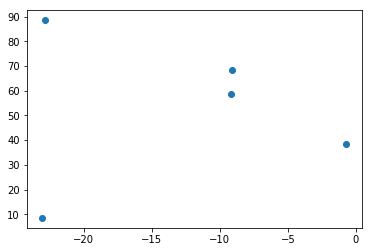

In [13]:
import matplotlib.pyplot as plt
plt.scatter(result_data_mat[:,0],result_data_mat[:,1])

##  Question 4

### A. Compute 3x3 Covariance matrix of the 5 tuples dataset we have.

In [14]:
mat = np.array([[0.5,4.5,2.5],[2.2,1.5,0.1], [3.9,3.5,1.1],[2.1,1.9,4.9],[0.5,3.2,1.2]])

u = np.mean(mat, axis = 0)
z = mat - mean
co_var = np.cov(z.T)
print(co_var)

[[ 2.008  -0.5185 -0.3455]
 [-0.5185  1.492  -0.054 ]
 [-0.3455 -0.054   3.428 ]]


### B. 1) Compute the three eigenvalues of the covariance matrix

$\lambda a + \lambda b + \lambda c = 2.008+1.492+3.428 = 3.446$<br>
$\lambda a \over \lambda b$ = 0.505 
therefore $\lambda a = 0.505 \lambda b$ <br><br>
$\lambda b \over \lambda c$ = 0.647 
therefore $\lambda c$= $\lambda b \over 0.647$<br><br>
$\lambda b+ 0.505 \lambda b +$ $ \lambda b \over 0.647$  = 3.446 <br><br>
therefore $\lambda b = 1.1296$  <br><br>
$\lambda a = 0.505 * 1.1296 = 0.5704$ <br><br>
$\lambda c = 1.7459$

### B. 2) Determine the explained variance